In [1]:
import pandas as pd
from backtest import backtest_dca

import config as cfg

In [ ]:
# !python load_data.py

Loading data for ['SPY', 'ASML.AS'] from 2025-02-07 to 2026-02-07...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Loading data for {'BTC': 'BTC-USD', 'ETH': 'ETH-USD', 'BNB': 'BNB-USD', 'XRP': 'XRP-USD', 'SOL': 'SOL-USD', 'TRON': 'TRX-USD', 'ADA': 'ADA-USD', 'XMR': 'XMR-USD', 'LINK': 'LINK-USD', 'AVAX': 'AVAX-USD'} from 2025-02-07 to 2026-02-07...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****

# crypto

In [3]:
df_crypto = pd.read_csv("data/crypto.csv", index_col=0, parse_dates=True)
df_crypto = df_crypto.dropna()
df_crypto

,BTC,ETH,BNB,XRP,SOL,TRON,ADA,XMR,LINK,AVAX
Date,,,,,,,,,,
2025-02-07,96529.085938,2622.211182,578.066833,2.393583,192.204651,0.229985,0.707093,205.212280,18.386972,24.450775
2025-02-08,96482.453125,2632.308350,613.324219,2.424376,199.599899,0.231648,0.701849,213.939270,18.464569,24.599567
2025-02-09,96500.093750,2628.721191,616.642090,2.396940,200.497559,0.232541,0.682701,220.115402,18.305155,24.912888
2025-02-10,97437.554688,2661.166748,618.314514,2.422696,200.356354,0.246144,0.710693,221.551575,18.766146,25.639519
2025-02-11,95747.429688,2602.781982,642.587280,2.414216,197.982361,0.241073,0.779399,222.664185,18.642302,25.391459
...,...,...,...,...,...,...,...,...,...,...
2026-02-02,78688.765625,2344.356689,774.579285,1.620547,104.471153,0.283123,0.298900,386.892914,9.806777,10.142554
2026-02-03,75633.546875,2227.558838,753.578186,1.574199,97.563904,0.285627,0.290788,374.591797,9.450989,9.895763
2026-02-04,73019.703125,2143.504150,697.861755,1.510476,92.029305,0.282773,0.286301,382.406860,9.251476,9.711348


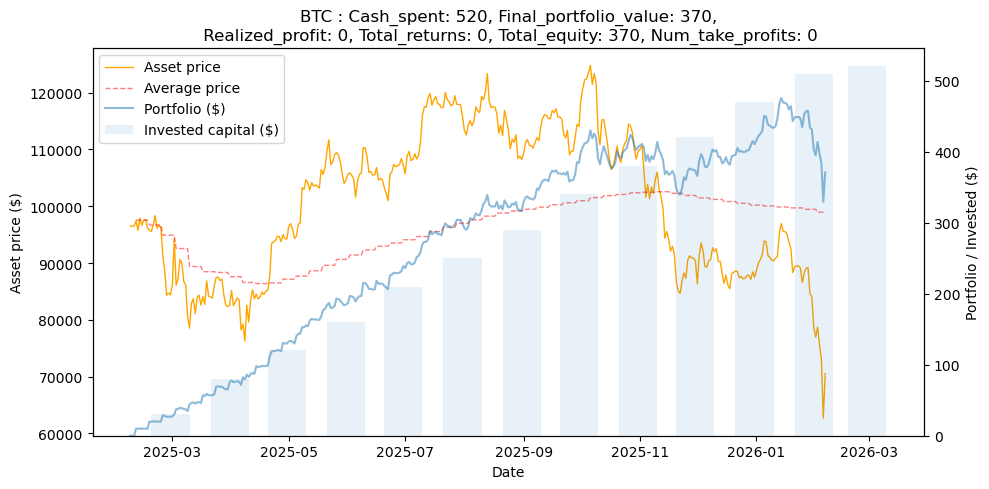

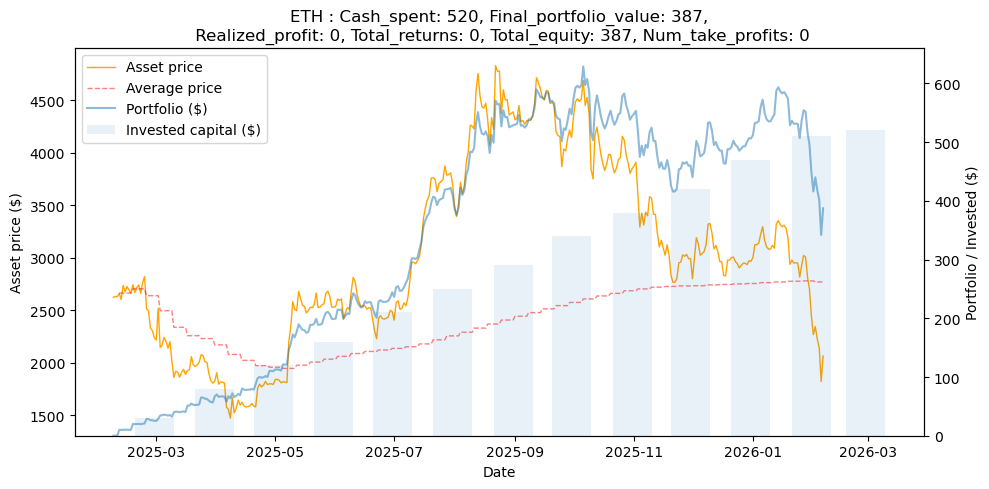

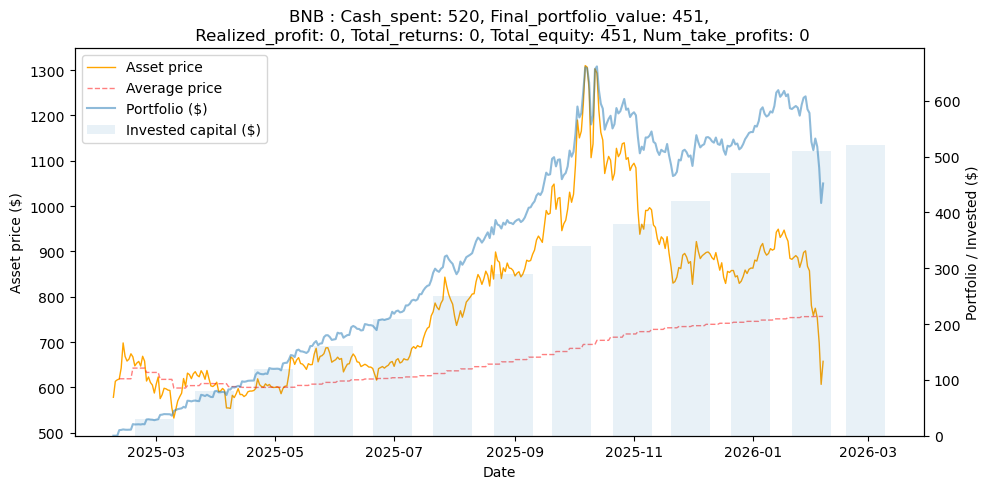

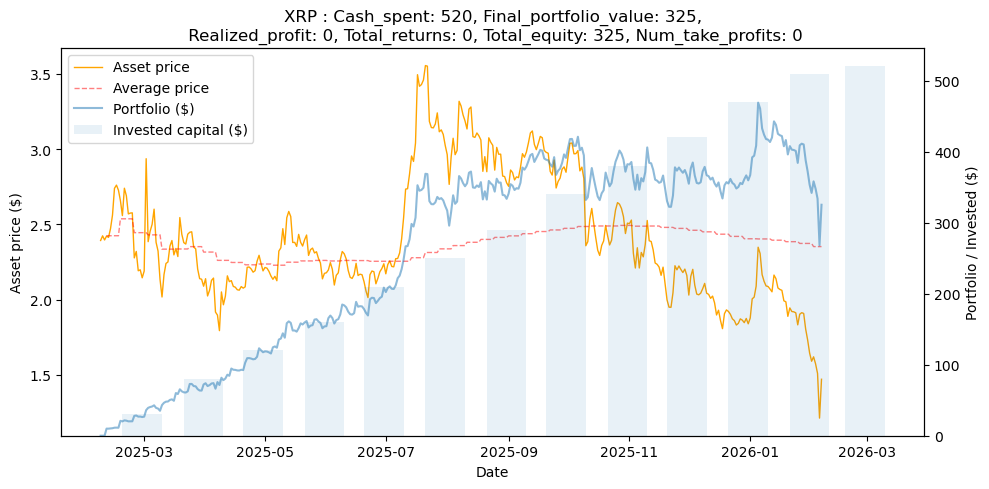

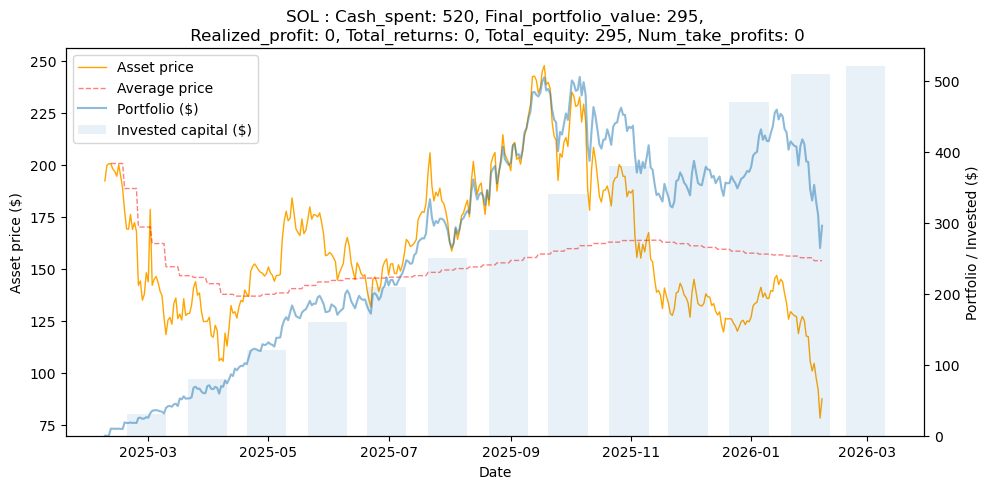

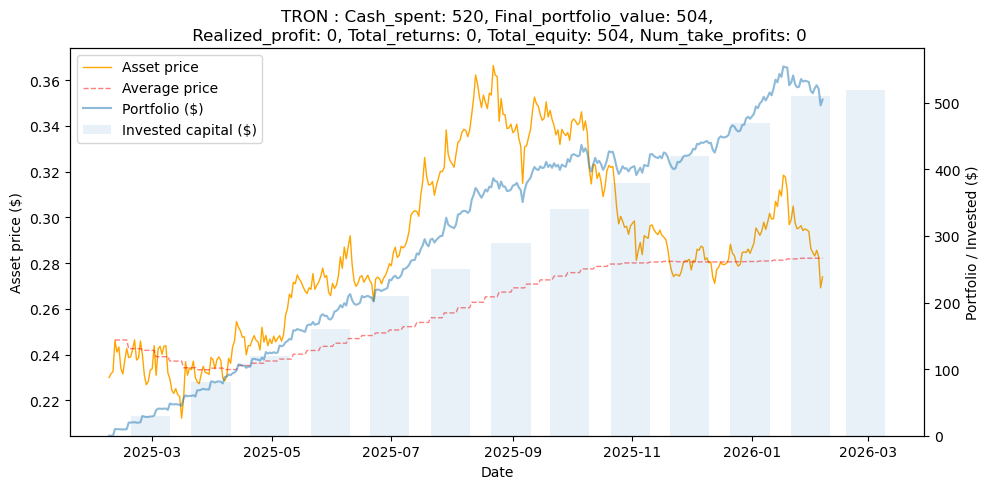

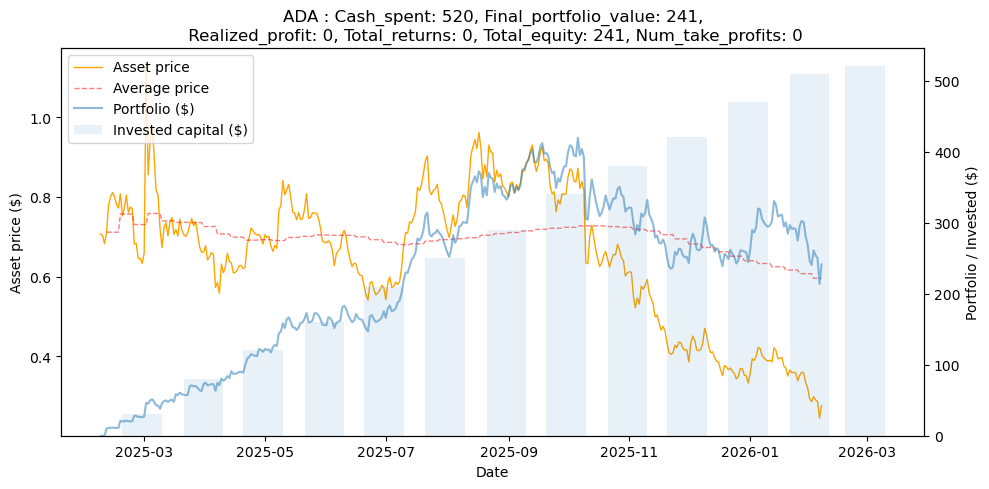

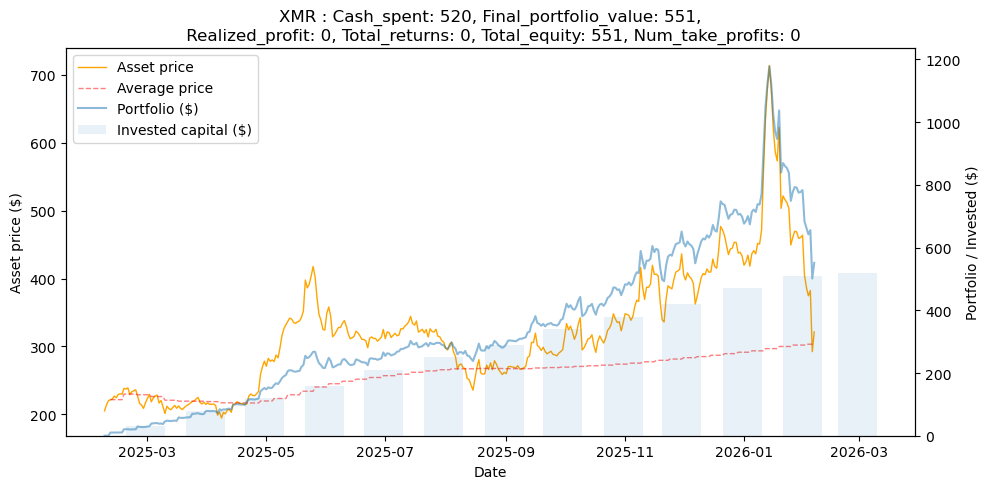

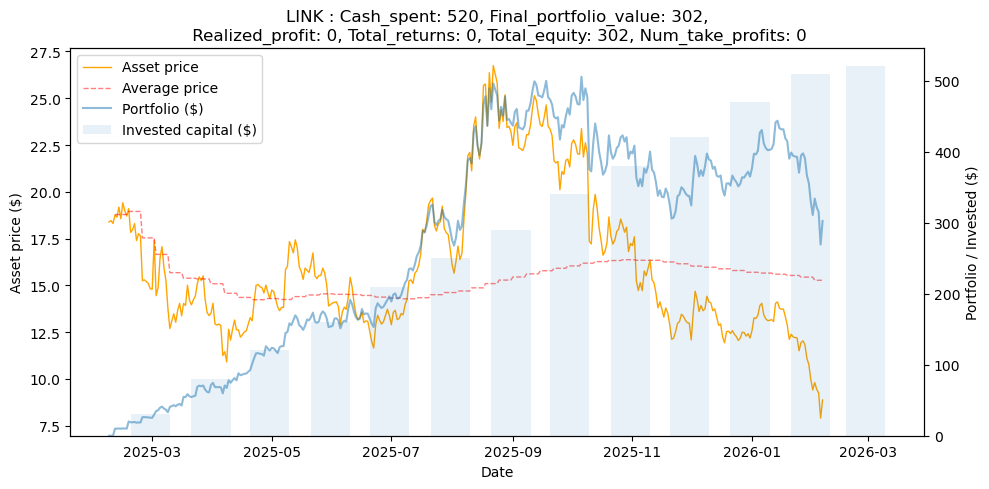

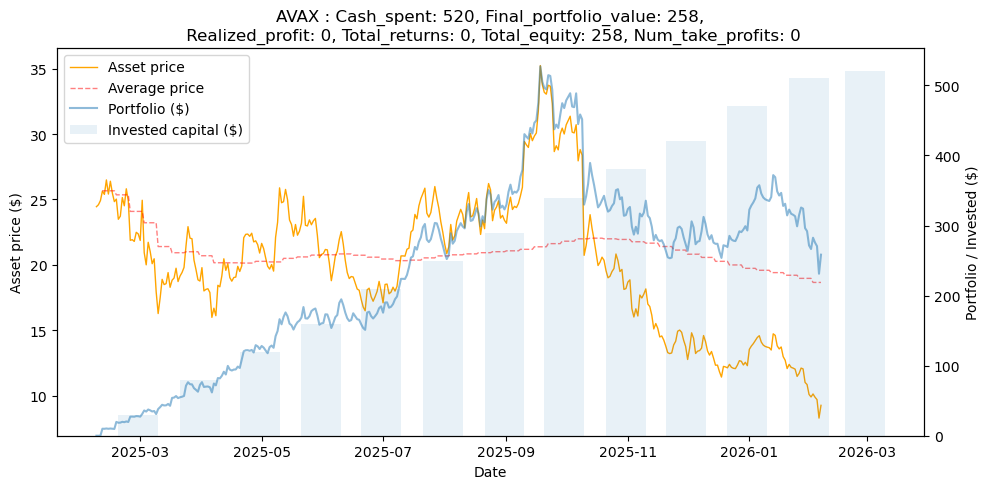

In [4]:
for token in df_crypto.columns:
    token_prices = df_crypto[token]

    backtest_dca(
        target=token,
        prices=token_prices,
        buy_amount=cfg.crypto_regular_amount,
        freq=cfg.crypto_freq,
        fee=cfg.crypto_fee,
        profit_multiple=cfg.crypto_profit_multiple,
        cooldown_days=180,
        plot=True
    )

# stocks

In [5]:
df_stocks = pd.read_csv("data/stocks.csv", index_col=0, parse_dates=True)
df_stocks = df_stocks.dropna()
df_stocks

,SPY,ASML.AS
Date,,
2025-02-07,600.770020,703.000000
2025-02-10,604.849976,717.000000
2025-02-11,605.309998,723.599976
2025-02-12,603.359985,718.400024
2025-02-13,609.729980,737.900024
...,...,...
2026-02-02,695.409973,1224.800049
2026-02-03,689.530029,1190.400024
2026-02-04,686.190002,1140.599976


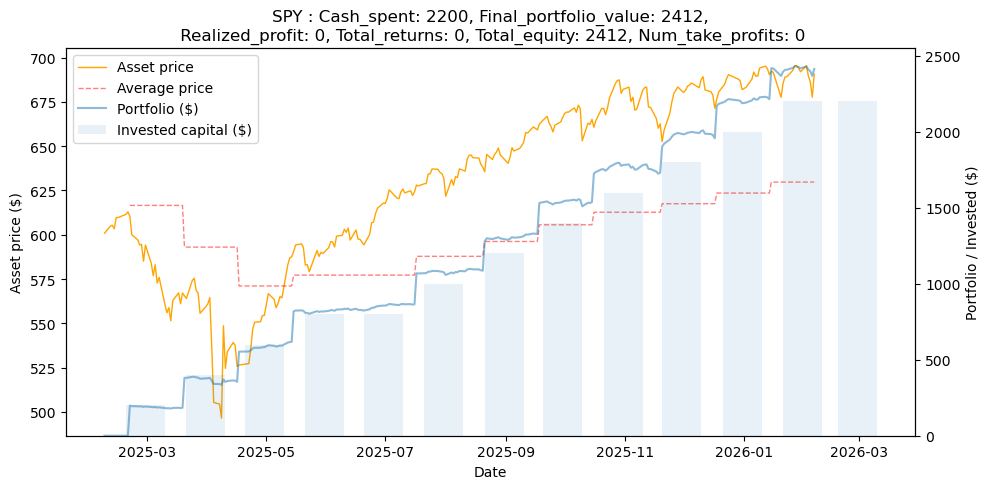

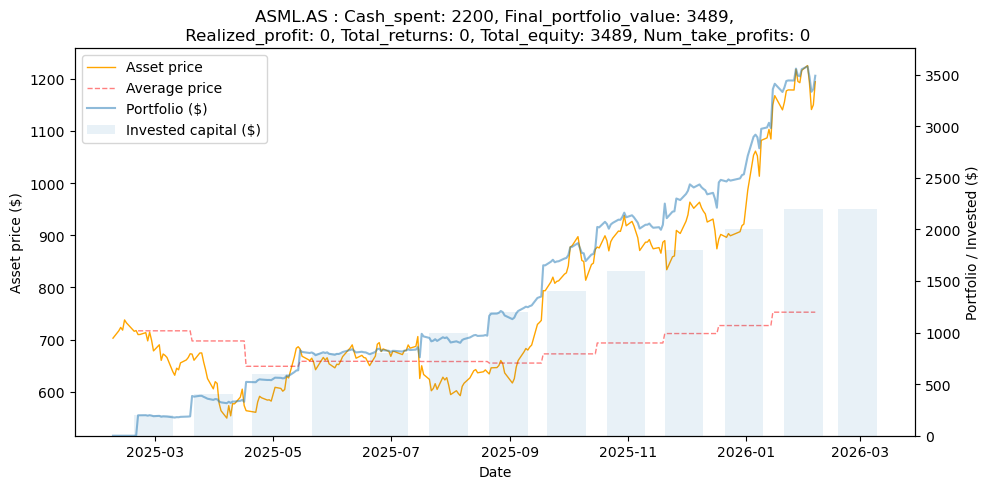

In [6]:
for stock in df_stocks.columns:
    stock_prices = df_stocks[stock]

    backtest_dca(
        target=stock,
        prices=stock_prices,
        buy_amount=cfg.stock_regular_amount,
        freq=cfg.stock_freq,
        fee=cfg.stock_fee,
        profit_multiple=cfg.stock_profit_multiple,
        cooldown_days=180,
        plot=True
    )